<a href="https://colab.research.google.com/github/abhishek-kakde/Linkedin_web_scrapping_EDA/blob/main/Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






**Below is the link for the jupyter notebook which is used for the web scrapping**

https://drive.google.com/file/d/1QRPbUWMAatuMpPpMP9aujTk_khASi6Qe/view?usp=sharing

**Below is the link for the csv file which we exported using above code**

https://drive.google.com/file/d/1j3kD1GxFNouYkGXxu5pvwR7mWJnuUKz-/view?usp=drive_link

**We have scrapped the data from linked in using local as it requires chrome driver which cant be accessed using  Google collab. After scrapping we have exported the csv file. In this collab notebook we will use the exported csv file for data visualization and EDA of linkedin Jobs.**

In [ ]:
   from google.colab import drive

   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np


**Reading csv file**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter assignments/Numerical Python Mid_course Assessment/linkedin_jobs.csv')

**Dropping unncessary column from the dataframe**

In [ ]:
df = df.drop('Unnamed: 0',axis =1)

**Displaying first rows of the data frame**

In [ ]:
df.head()

,company_name,job_title,location,JOB_PORTAL
0,USEReady,ML Engineer,"Bengaluru, Karnataka, India",LINKEDIN
1,THire Global Services,Python &amp; Machine Learning Engineer - Panda...,"Bengaluru, Karnataka, India",LINKEDIN
2,56 Secure,Machine Learning Engineer,"Bengaluru, Karnataka, India",LINKEDIN
3,Kaara,AI/ML Developer,"Hyderabad, Telangana, India",LINKEDIN
4,BitGo,Data Scientist,"Bengaluru, Karnataka, India",LINKEDIN


**Displaying last rows of the data frame**

In [ ]:
df.tail()

,company_name,job_title,location,JOB_PORTAL
480,Genpact,Lead Consultant - Oracle fusion Functional / T...,"Hyderabad, Telangana, India",LINKEDIN
481,Arrise Solutions (India) Pvt. Ltd.,Full Stack Engineer-Video Streaming/NodeJS,"Hyderabad, Telangana, India",LINKEDIN
482,Alithya,Oracle Cloud EPM Offshore Data Integration Con...,"Hyderabad, Telangana, India",LINKEDIN
483,Genpact,Principal Consultant-Senior Snowflake Develope...,"Hyderabad, Telangana, India",LINKEDIN
484,Accenture in India,IBM Maximo Application Designer,"Bengaluru, Karnataka, India",LINKEDIN


In [ ]:
df.describe()

,company_name,job_title,location,JOB_PORTAL
count,485,485,485,485
unique,243,396,3,1
top,Genpact,Data Engineer,"Bengaluru, Karnataka, India",LINKEDIN
freq,56,10,287,485


**As we can see that top company offering more number of jobs is Genpact, with the job title as 'Data Engineer', and the location is Bengaluru, Karnataka, India
Total jobs from Genpact = 56,
Jobs of title 'Data Engineer' = 10, 287 jobs in Bengaluru**

**Displaying column names**

In [ ]:
df.columns

Index(['company_name', 'job_title', 'location', 'JOB_PORTAL'], dtype='object')

**Identifying Null values**

In [ ]:
df.isnull().sum()

company_name    0
job_title       0
location        0
JOB_PORTAL      0
dtype: int64

**Checking duplicate values**

In [ ]:
df['job_title'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
480    False
481    False
482    False
483    False
484    False
Name: job_title, Length: 485, dtype: bool

**

**Checking for different locations available**

In [ ]:
locations = df['location'].unique()

In [ ]:
df['company_name'].duplicated().sum()

242

We can see there are 242 comapanies which have posted jobs more than one time

In [ ]:
companies = {'Names': [], 'Qty': []}
duplicates = []

for i in df['company_name']:
    if i in companies['Names']:
        duplicates.append(i)
        index = companies['Names'].index(i)
        companies['Qty'][index] += 1
    else:
        companies['Names'].append(i)
        companies['Qty'].append(1)

In [ ]:
cs = pd.DataFrame(companies)

In [ ]:
job_posters = cs.sort_values(by='Qty',ascending = False)

In [ ]:
job_posters = job_posters[job_posters['Qty'] != 1]

([<matplotlib.patches.Wedge at 0x7e2fb0e37a30>,
 [Text(0.919732350219786, 0.6034006993360125, 'Genpact'),
  Text(0.14216527352427463, 1.0907745115301184, 'Intel Corporation'),
  Text(-0.3529083307405733, 1.041852057680889, 'KAVYA INTERPRISES'),
  Text(-0.6820104918062194, 0.8630536999898899, 'EPAM Systems'),
  Text(-0.9005217644289953, 0.6317123964192005, 'OptimHire'),
  Text(-1.0283622297260724, 0.3904755107209935, 'Goldman Sachs'),
  Text(-1.0928535252970857, 0.12518455274406726, 'Accenture in India'),
  Text(-1.0900228583741889, -0.14781802400845107, 'Wells Fargo'),
  Text(-1.0436675807029823, -0.34750249062356947, 'GfK - An NIQ Company'),
  Text(-0.9924752724118284, -0.4743340949700612, 'Tata Consultancy Services'),
  Text(-0.9320461908877934, -0.5842002208588724, 'Uplers'),
  Text(-0.8665777384225615, -0.6775271384014361, 'Fusion Plus Solutions Inc'),
  Text(-0.7996760766740246, -0.7553265336232003, 'VARITE INC'),
  Text(-0.7343469723161251, -0.8189838363790463, 'Revature'),
  Tex

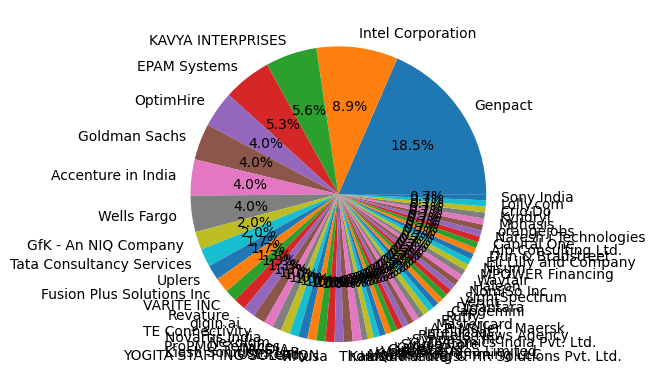

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
labels = job_posters['Names']
sizes = job_posters['Qty']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%')

**From the above pie chart we can see that Genpact has posted about 18.5% of jobs. Then comes the Intel Corporation with 8.9% of jobs, then following the KAVYA INTERPRISES with 5.6% then EPAM.**

In [ ]:
genpact_jobs = df['job_title'][df['company_name']=='Genpact']
genpact_jobs

138                           Business analyst-BFS032343
141           Assistant Manager - Data Science-ANA002976
142                Asst Manager – Data Science-ANA009599
152                 Consultant - Data Engineer-ITO068520
165                   Consultant-Data Engineer-ITO074084
173                       Associate Operations-ANA009605
174                       Associate Operations-ANA009605
176                       Associate Operations-ANA009606
215                 Consultant - Data Engineer-ITO074107
218                     Senior Manager - AI/ML-ANA002973
228                          Process Developer-HIG015403
234                    AM RTR - Data Analytics-MAN013903
235                 Consultant - Data Engineer-ITO074108
242                 Consultant - Data Engineer-ITO074105
243                Consultant - Data Engineer3-ITO074103
262               Assistant Manager - Power BI-CPG021903
265          Assistant Manager - Power BI Lead-HIG015647
273    Assistant Manager - Supp

**Above is the list of jobs offered by the company Genpact**

In [ ]:
len(genpact_jobs)


56

**We can see that Genpact has posted 56 jobs in the portal**

In [ ]:
intel_jobs = df['job_title'][df['company_name']=='Intel Corporation']

In [ ]:
intel_jobs

35                      AI Software Development Engineer
47                                AI Frameworks Engineer
53                      AI Software Application Engineer
54                      AI Software Application Engineer
60                      AI Software Development Engineer
65     Systems Analyst - Supply Chain Data and Analytics
68     Systems Analyst - Supply Chain Data and Analytics
109                  Cloud Software Development Engineer
139    AI Software Solutions Engineer (AI Frameworks,...
175           AI Software Solution Engineer (Validation)
209                  Cloud Software Development Engineer
227                     Post Silicon validation Engineer
244                  Cloud Software Development Engineer
253                  Development Tools Software Engineer
255          AI Software Solutions Engineer (Kernel Dev)
268                        Information Security Engineer
272            AI Software Solutions Engineer (Embedded)
289                            

**Above is the list of jobs offered by the company Intel**

In [ ]:
len(intel_jobs)

27

**Intel has posted 27 jobs in the portal**

In [ ]:
kavya_jobs = df['job_title'][df['company_name']=='KAVYA INTERPRISES']

In [ ]:
len(kavya_jobs)

17

**Kavya jobs has posted 17 jobs**

In [ ]:
kavya_jobs

50                  Data Scientist Urgent Vacancy
74                  Data Scientist Urgent Vacancy
157    Data Analyst Hiring Fresher and Experience
161                 Data Scientist Urgent Vacancy
182                    Data Scientist Recruitment
206                    Data Scientist Recruitment
216                    Data Scientist Recruitment
274    Data Analyst Hiring Fresher and Experience
364                 Medical Biller Urgent Vacancy
371                 Medical Biller Urgent Vacancy
426                    Medical Biller Recruitment
432                    Medical Biller Recruitment
433                    Medical Biller Recruitment
436                    Medical Biller Recruitment
437                    Medical Biller Recruitment
452                     Hiring For Medical Biller
455                     Hiring For Medical Biller
Name: job_title, dtype: object

**Above is the list of jobs offered by the company Kavya**

In [ ]:
epam_jobs = df['job_title'][df['company_name']=='EPAM Systems']

In [ ]:
epam_jobs

29                  Senior Engineer Machine Learning
31                     Sr. Engineer Machine Learning
33                     Sr. Engineer Machine Learning
37                  Senior Engineer Machine Learning
39     Senior Engineer - Machine Learning Operations
41       Senior Machine Learning Operations Engineer
46     Senior Engineer - Machine Learning Operations
51                      Senior Engineer Data Science
57                      Senior Engineer Data Science
64                      Senior Data Science Engineer
75       Senior Machine Learning Operations Engineer
103                     Senior Data Science Engineer
151                         Senior Power BI Engineer
188                       Senior Engineer - Big Data
202                         Senior Big Data Engineer
212                         Senior Power BI Engineer
Name: job_title, dtype: object

In [ ]:
len(epam_jobs)

16

**EPAM Jobs has posted 16 jobs**

In [ ]:
distinct_job_titles = len(df['job_title'].unique())
distinct_job_titles

396

**We found that there are 396 different jobs available**

In [ ]:
Locations = {'Names': [], 'Qty': []}
duplicates = []

for i in df['location']:
    if i in Locations['Names']:
        duplicates.append(i)
        index = Locations['Names'].index(i)
        Locations['Qty'][index] += 1
    else:
        Locations['Names'].append(i)
        Locations['Qty'].append(1)

In [ ]:
Locations

{'Names': ['Bengaluru, Karnataka, India',
  'Hyderabad, Telangana, India',
  'Pune, Maharashtra, India'],
 'Qty': [287, 137, 61]}

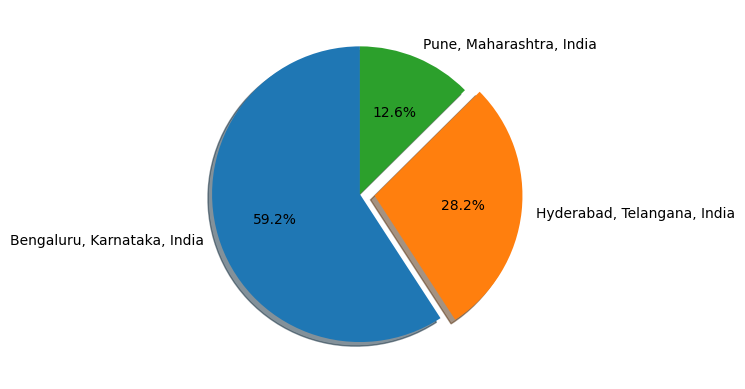

In [ ]:
labels = Locations['Names']
sizes = Locations['Qty']
# plt.subplots()
explode = (0, 0.1, 0)
plt.title = "Job distribution by location"
plt.pie(sizes, labels=labels,autopct='%1.1f%%',explode=explode,shadow=True, startangle=90)
plt.show()


**After analyzing the pie chart we can see that most of the jobs i.e 59.2% are in Bengaluru Karnataka Region that might be because of most startups available in this region**

**After analyzing the pie chart we can see that most of the jobs i.e 28.2% are in Hyderabad, Telangana Region**

**Then in  the pie chart we can see that most of the jobs i.e 12.6% are in Pune Region**